# Mount colab with google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load Dataset

In [ ]:
% cd "/content/drive/MyDrive/Colab Notebooks/AI_Project"

/content/drive/MyDrive/Colab Notebooks/AI_Project


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob

In [ ]:
IMAGE_SIZE = 224

In [ ]:
img_dir = "/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations'
text_files = ['/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

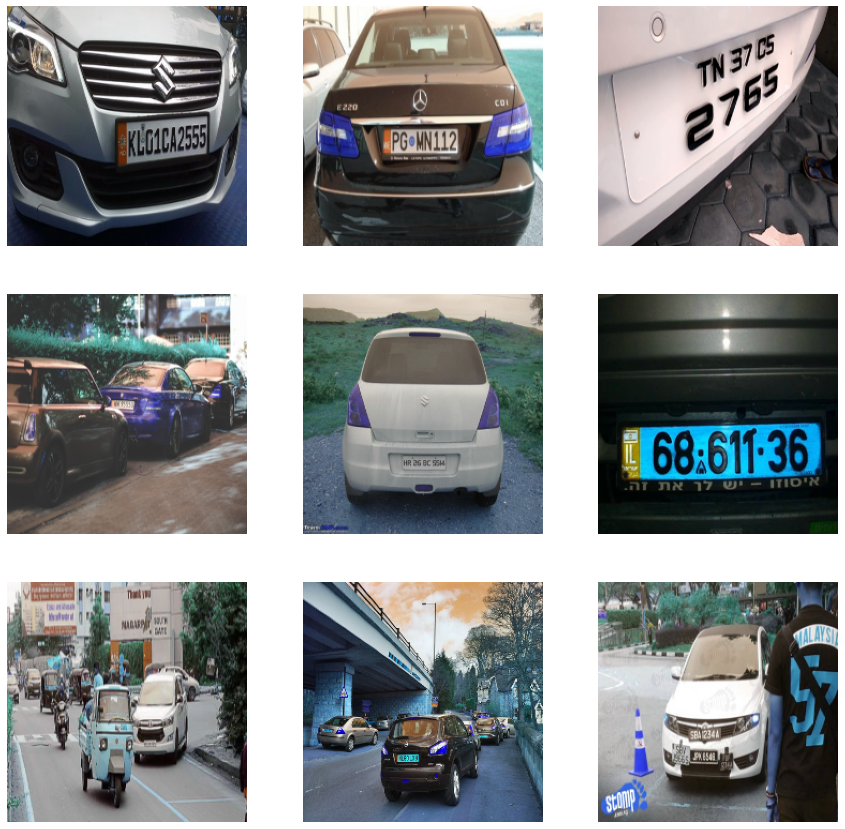

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,9) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(X[i], cmap = 'jet')

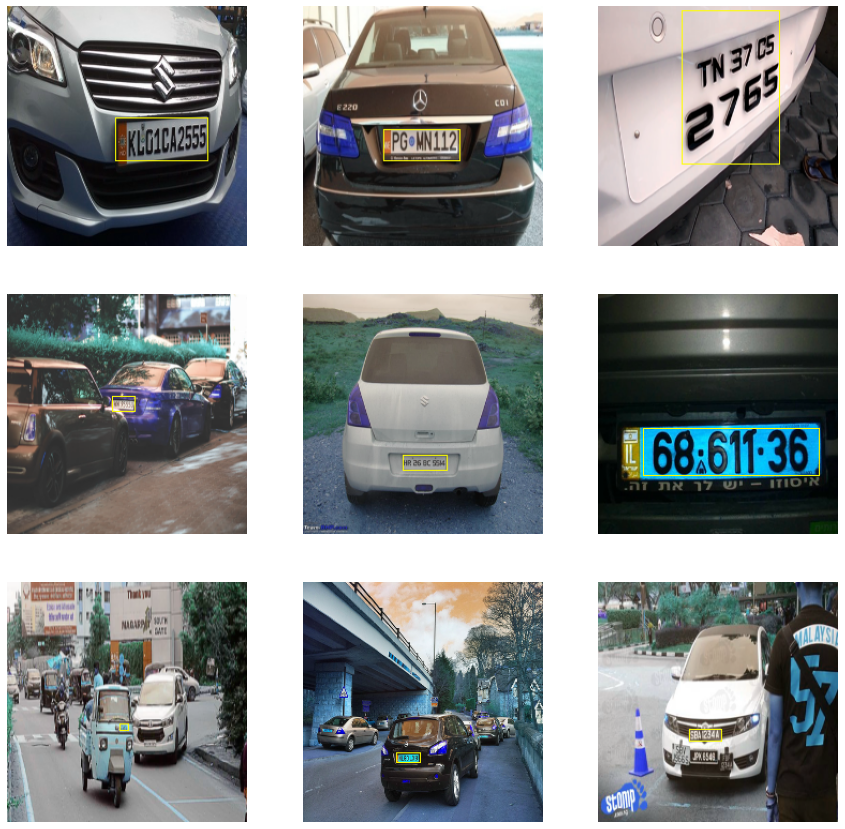

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,9) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(255,255,0))
    #plt.imshow(X[i], cmap = 'jet')
    plt.imshow(image)

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars10.xml	169	147	78	4

In [ ]:
image = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(255,255,0))

# Prepare Dataframe to understand data

In [ ]:
dataset = dict()
dataset["image_path"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()
print(len(text_files))
path = sorted(text_files)
# index = 0
for index in range(0,433):
    dataset["image_path"].append(path[index])    
    dataset["top_x"].append(y[index][0])
    dataset["top_y"].append(y[index][1])
    dataset["bottom_x"].append(y[index][2])
    dataset["bottom_y"].append(y[index][3])



print(dataset["image_path"])
print(dataset)
df = pd.DataFrame(dataset)

print(df.tail())


433
['/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars0.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars1.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars10.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars100.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars101.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars102.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars103.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars104.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars105.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars106.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars107.xml', '/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annota

In [ ]:
df.head()

,image_path,top_x,top_y,bottom_x,bottom_y
0,/content/drive/MyDrive/Colab Notebooks/AI_Proj...,187,144,101,104
1,/content/drive/MyDrive/Colab Notebooks/AI_Proj...,146,144,75,115
2,/content/drive/MyDrive/Colab Notebooks/AI_Proj...,169,147,78,4
3,/content/drive/MyDrive/Colab Notebooks/AI_Proj...,119,109,98,95
4,/content/drive/MyDrive/Colab Notebooks/AI_Proj...,134,164,93,150


In [ ]:
resizeannotation("/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars147.xml")

[188, 141, 101, 104]

In [ ]:
# resizeannotation("/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars10.png")
resizeannotation(text_files[2])
print(text_files[2])

/content/drive/MyDrive/Colab Notebooks/AI_Project/Dataset/annotations/Cars10.xml


# Save prepared Dataframe which contains img path and cordinates

In [ ]:
df.to_csv("vehicle_dataset_co_ordinates.csv", index=False)

# Prepare Basic CNN Model

In [ ]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3

In [ ]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# model = Sequential()
# model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
# model.add(Flatten())
# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dense(4, activation="sigmoid"))

# model.layers[-6].trainable = False

# model.summary()

## convert Image lists into arrays

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
#Renormalisation
X = X / 255
y = y / 255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[0:433], y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D,MaxPooling2D,Dense
model = Sequential()
model.add(Conv2D(64 , (3,3) , input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32 , (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='mean_squared_error',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
11/11 [==============================] - 38s 3s/step - loss: 0.0831 - accuracy: 0.2714 - val_loss: 0.0314 - val_accuracy: 0.4872
Epoch 2/10
11/11 [==============================] - 34s 3s/step - loss: 0.0257 - accuracy: 0.4800 - val_loss: 0.0284 - val_accuracy: 0.4359
Epoch 3/10
11/11 [==============================] - 33s 3s/step - loss: 0.0217 - accuracy: 0.5743 - val_loss: 0.0265 - val_accuracy: 0.6410
Epoch 4/10
11/11 [==============================] - 33s 3s/step - loss: 0.0173 - accuracy: 0.6514 - val_loss: 0.0229 - val_accuracy: 0.7436
Epoch 5/10
11/11 [==============================] - 35s 3s/step - loss: 0.0118 - accuracy: 0.7714 - val_loss: 0.0196 - val_accuracy: 0.8462
Epoch 6/10
11/11 [==============================] - 39s 3s/step - loss: 0.0084 - accuracy: 0.7914 - val_loss: 0.0169 - val_accuracy: 0.7692
Epoch 7/10
11/11 [==============================] - 33s 3s/step - loss: 0.0056 - accuracy: 0.8286 - val_loss: 0.0176 - val_accuracy: 0.8462
Epoch 8/10
11/11 [==

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 65.91%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

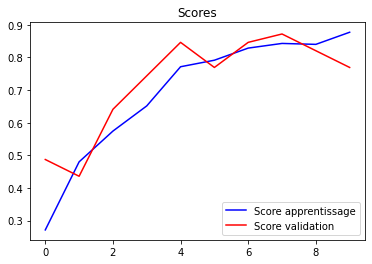

In [ ]:
plot_scores(train)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))

print("Test results \n Loss:",test_loss,'\n Accuracy',test_accuracy)

100/100 [==============================] - 2s 15ms/step - loss: 0.0120 - accuracy: 0.6591
Test results 
 Loss: 0.012007806450128555 
 Accuracy 0.6590909361839294


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/AI_Project/Model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/AI_Project/Model/my_model/assets


In [ ]:
y_cnn = model2.predict(X_test)

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.densenet import DenseNet169
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator


# Base Imagenet Model

In [ ]:
model2 = Sequential()
model2.add(VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(4, activation="sigmoid"))

model2.layers[-6].trainable = False
model2.compile(optimizer='adam',
              loss='mean_squared_error',
             metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               3211392   
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,938,756
Trainable params: 3,224,068
N

In [ ]:
train = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
11/11 [==============================] - 18s 555ms/step - loss: 0.0803 - accuracy: 0.4371 - val_loss: 0.0589 - val_accuracy: 0.5641
Epoch 2/20
11/11 [==============================] - 2s 174ms/step - loss: 0.0238 - accuracy: 0.5543 - val_loss: 0.0265 - val_accuracy: 0.4615
Epoch 3/20
11/11 [==============================] - 2s 175ms/step - loss: 0.0114 - accuracy: 0.6771 - val_loss: 0.0130 - val_accuracy: 0.8205
Epoch 4/20
11/11 [==============================] - 2s 176ms/step - loss: 0.0056 - accuracy: 0.7286 - val_loss: 0.0121 - val_accuracy: 0.7436
Epoch 5/20
11/11 [==============================] - 2s 175ms/step - loss: 0.0030 - accuracy: 0.8429 - val_loss: 0.0116 - val_accuracy: 0.7949
Epoch 6/20
11/11 [==============================] - 2s 177ms/step - loss: 0.0020 - accuracy: 0.8771 - val_loss: 0.0109 - val_accuracy: 0.8718
Epoch 7/20
11/11 [==============================] - 2s 177ms/step - loss: 0.0012 - accuracy: 0.9000 - val_loss: 0.0103 - val_accuracy: 0.8718
Epoch

In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/AI_Project/Model/my_model_EfficientNetB7_pretrained')

In [ ]:
model2.save('/content/drive/MyDrive/Colab Notebooks/AI_Project/Model/my_model_VGG16_accuracy_84')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/AI_Project/Model/my_model_VGG16_accuracy_84/assets


In [ ]:
# Test
scores = model2.evaluate(X_test, y_test, verbose=1)
print("Score : %.2f%%" % (scores[1]*100))

2/2 [==============================] - 2s 1s/step - loss: 0.0068 - accuracy: 0.8409
Score : 84.09%


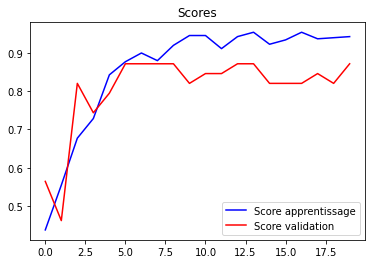

In [ ]:
plot_scores(train)

In [ ]:
y_cnn = model2.predict(X_test)

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.